# S08 T01: Tasca del test d'hipòtesis
## Descripció
Aprèn a realitzar test d'hipòtesis amb Python.

In [1]:
#Importamos las librerias:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

pd.set_option('display.max_columns', None)

## Nivell 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

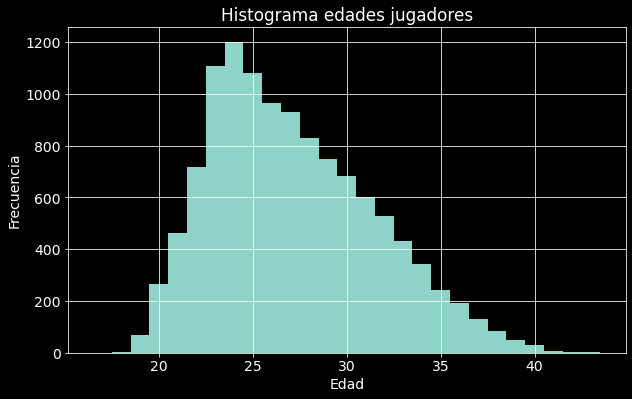

In [2]:
# Utilizaremos el mismo dataset de jugadores de la NBA de la S06_T01: https://www.kaggle.com/justinas/nba-players-data
df = pd.read_csv(r'..\DB\all_seasons.csv')

# Trabajaremos con la columna "age".
edad = df['age']

plt.style.use('dark_background')
plt.rcParams.update({'font.size': 14, 'figure.figsize': (10, 6)}) # set font and plot size to be larger

bins = range(17, 45)
plt.hist(edad,  bins=bins, align='left')
plt.title('Histograma edades jugadores')
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

In [3]:
muestra_edad = edad.sample(100)
muestra_edad

688     22.0
8013    29.0
734     30.0
5276    25.0
596     31.0
        ... 
4570    26.0
7463    20.0
7183    25.0
7920    26.0
9848    24.0
Name: age, Length: 100, dtype: float64

Seleccionamos la hipótesis nula (H0) y la hipótesis alternativa (Ha):
- Hipótesis nula, H0: La media de edad de los jugadores profesionales es de 24 años
- Hipótesis alternativa, H1:La media de edad de los jugadores profesionales no es de 24 años

Utilizaremos el test One Sample T Test 

In [4]:
# https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
from scipy.stats import ttest_1samp

edad_mean = np.mean(edad)
print(f'La media de edad es {round(edad_mean,2)}')
tset1, pval1 = ttest_1samp(edad, 24)
print(f'p-value = {pval1}, tset1 = {tset1}')
if pval1 < 0.05:    # alpha value is 0.05 or 5%
   print("Se rechaza la hipotesis nula (H0 = media de edad 24)")
else:
  print("Aceptamos la hipotesis nula")

La media de edad es 27.13
p-value = 0.0, tset1 = 78.05840301341786
Se rechaza la hipotesis nula (H0 = media de edad 24)


In [5]:
# Rehacemos el test pasándole al ttest la media real, en vez de la esperada, por lo que H0: La media de edad de los jugadores profesionales es de 27,13 años
print('H0: La media de edad de los jugadores profesionales es de 27,13 años \nH1: La media de edad de los jugadores profesionales NO es de 27,13 años')
tset2, pval2 = ttest_1samp(edad, 27.13)
print(f'p-value2 = {pval2}, tset2 = {tset2}')
if pval2 < 0.05:    # alpha value is 0.05 or 5%
   print("Se rechaza la hipotesis nula (H0 = media de edad 24)")
else:
  print("Aceptamos la hipotesis nula")

H0: La media de edad de los jugadores profesionales es de 27,13 años 
H1: La media de edad de los jugadores profesionales NO es de 27,13 años
p-value2 = 0.9609247587277212, tset2 = 0.04899419466516724
Aceptamos la hipotesis nula


Podemos probar también con el One Sample Z-Test. Recordamos H0 y H1
- Hipótesis nula, H0: La media de edad de los jugadores profesionales es de 24 años
- Hipótesis alternativa, H1:La media de edad de los jugadores profesionales no es de 24 años

In [6]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(edad, x2=None, value=24)
print(f'p-value = {float(pval)}, z-test = {ztest}')
if pval<0.05:
    print("Se rechaza la hipótesis nula")
else:
    print("Se acepta la hipótesis nula")

p-value = 0.0, z-test = 78.05840301341786
Se rechaza la hipótesis nula


Observamos que obtenemos el mismo resultado que en el primer caso, con ttest_1samp y H0: media = 24

## Nivell 2
### Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [7]:
df.head(2)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97


Trabajaremos ahora con la altura (player_height) y el peso (player_weight) de los jugadores. Definimos hipótesis nula y alternativa:
- H0: No hay correlación entre altura y peso
- H1: Hay correlación entre altura y peso

Text(0.5, 1.0, 'Histograma Peso')

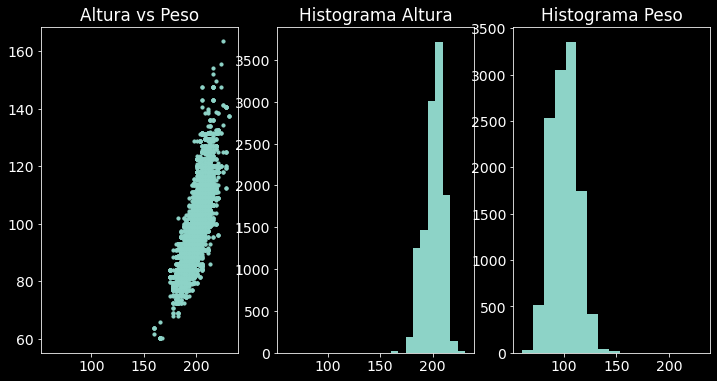

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(12, 6))

ax0.scatter(df['player_height'], df['player_weight'], s=10)
ax0.set_title('Altura vs Peso')
ax1.hist(df['player_height'])
ax1.set_title('Histograma Altura')
ax2.hist(df['player_weight'])
ax2.set_title('Histograma Peso')

In [9]:
from scipy.stats import pearsonr # calculate Pearson's correlation
corr, _ = pearsonr(df['player_height'], df['player_weight'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.827


Como cabía esperar, existe una alta correlación entre la altura y el peso de los jugadores.

## Nivell 3
### Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [10]:
df['country'].value_counts()

USA                    9836
France                  167
Canada                  161
Spain                    83
Brazil                   83
                       ... 
Sudan                     2
Ghana                     1
Guinea                    1
Trinidad and Tobago       1
Sudan (UK)                1
Name: country, Length: 79, dtype: int64

Miraremos los partidos jugados según país de procedencia del jugador (USA, France y Canada):
- H0: la media de partidos jugados según la procedencia es igual
- H1: la media de partidos jugados según la procedencia NO es igual


Para ello realizaremos un test ANOVA (https://www.scribbr.com/statistics/one-way-anova/): la variable independiente es el país de procedencia. Seleccionaremos 3 "niveles": USA, Francia o Canadá; y la variable dependiente es los partidos jugados.

In [11]:
# Creamos un nuevo df con la información de los 3 países
df_anotaciones = df[df['country'].isin(['USA','France','Canada'])]
df_anotaciones['country'].value_counts()

USA       9836
France     167
Canada     161
Name: country, dtype: int64

In [12]:
df_anotaciones.head(2)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97


In [21]:
# Tenemos que separar los grupos
gp_usa = df_anotaciones.loc[df.country=='USA', 'gp'].dropna()
gp_canada = df_anotaciones.loc[df.country=='Canada', 'gp'].dropna()
gp_france = df_anotaciones.loc[df.country=='France', 'gp'].dropna()


In [23]:
# Realizamos el test ANOVA one way
from scipy.stats import f_oneway
stat, p = f_oneway(gp_usa, gp_canada, gp_france)

print(f'P-Value = {p}\nStat= {stat}')


P-Value = 0.04107121681061214
Stat= 3.193450957423003


Vemos que el P-Value es menor que alpha (0,05), por lo que rechazamos la H0: la media de partidos jugados es diferente según la procedencia.